IMDB Datasets

In [116]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [117]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [118]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [119]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 5s 40ms/step - loss: 0.5782 - acc: 0.6882 - val_loss: 0.3836 - val_acc: 0.8741
Epoch 2/5
118/118 [==============================] - 1s 10ms/step - loss: 0.3837 - acc: 0.8500 - val_loss: 0.2907 - val_acc: 0.8849
Epoch 3/5
118/118 [==============================] - 1s 9ms/step - loss: 0.2837 - acc: 0.8969 - val_loss: 0.2750 - val_acc: 0.8885
Epoch 4/5
118/118 [==============================] - 1s 10ms/step - loss: 0.2235 - acc: 0.9223 - val_loss: 0.2884 - val_acc: 0.8869
Epoch 5/5
118/118 [==============================] - 1s 9ms/step - loss: 0.1986 - acc: 0.9335 - val_loss: 0.3270 - val_acc: 0.8803


In [120]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3383 - acc: 0.8747


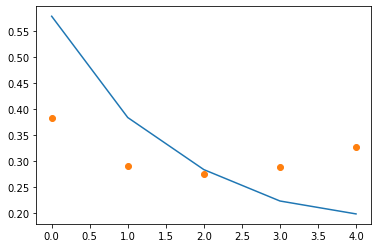

In [121]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

IMDB Classification using simple RNN

In [122]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [123]:
X_train #train이 gen[0]에 대응? sequence  MinMaxScaler


array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [124]:

rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정
rnn.compile(optimizer='nadam',loss='mse')

In [125]:
rnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          1568      
Total params: 161,568
Trainable params: 161,568
Non-trainable params: 0
_________________________________________________________________


In [126]:

X_train.shape,y_train.shape,X.shape

((25000, 100), (25000,), (25000,))

In [127]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [129]:
X = np.reshape(X_train, (len(X_train), X_train.shape[1], 1))
X

array([[[1415],
        [  33],
        [   6],
        ...,
        [  19],
        [ 178],
        [  32]],

       [[ 163],
        [  11],
        [3215],
        ...,
        [  16],
        [ 145],
        [  95]],

       [[1301],
        [   4],
        [1873],
        ...,
        [   7],
        [ 129],
        [ 113]],

       ...,

       [[  11],
        [   6],
        [4065],
        ...,
        [   4],
        [3586],
        [   2]],

       [[ 100],
        [2198],
        [   8],
        ...,
        [  12],
        [   9],
        [  23]],

       [[  78],
        [1099],
        [  17],
        ...,
        [ 204],
        [ 131],
        [   9]]])

In [133]:
history=rnn.fit(X,y_train,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1195 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10399 squared_difference
        "SquaredDifference", x=x, y=y, name=name)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:593 _create_op_internal
        compute_device)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3485 _create_op_internal
        op_def=op_def)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1975 __init__
        control_input_ops, op_def)
    C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 100 and 32 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_12/simple_rnn_9/transpose_1, mean_squared_error/Cast)' with input shapes: [32,100,32], [32,1].
